In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.1f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model

# Goal:
Find out what factors unfluence life expectancy for countries.
To help countries improve life expectancy.

# Data

- 1. Birth Rate: Number of births per 1,000 population per year.
- 2. health: Total health spending as %age of Total GDP
- 3. Hepatitis_B: Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
- 4. Measles: Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
- 5. income: Net income per person
- 6. inflation: The measurement of the annual growth rate of the Total GDP
- 7. Alcohol_consumption: Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
- 8. BMI: BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of
- 9. Polio: Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
- 10. Diphtheria: Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
- 11. Incidents of HIV per 1000 population aged 15-49
- 12. Schooling: Average years that people aged 25+ spent in formal education
- 13. GDP: Gross Domestic Product, the total value of goods and services produced in the country.
- 14. Gross tertiary education enrollment (%): Gross enrollment ratio for tertiary education.
- 15. Infant mortality: Number of deaths per 1,000 live births before reaching one year of age.
- 16. Life expectancy: Average number of years a newborn is expected to live.
- 17. Maternal mortality ratio: Number of maternal deaths per 100,000 live births.
- 18. Physicians per thousand: Number of physicians per thousand people.
- 19. Unemployment rate: Percentage of the labor force that is unemployed.
- 20. Urban_population: population living in urban areas.
- 21. Clean fuel %: Percentage of the population with access to clean fuel for making food
- 22. GDP per capita: GDP/population
- 23. country
- 24. region
- 25. population: number of citizens

# Reading the data


In [4]:
d1 = pd.read_csv("/Users/markgonzalesnielsen/Desktop/biEksamen/out3.csv")

In [5]:
vis = d1.copy()
vis.head(100)

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.6,1610,9.4,Asia,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,1,Albania,6.5,9930,4.5,Rest of Europe,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,2,Algeria,4.2,12900,16.1,Africa,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,3,Angola,2.9,5900,22.4,Africa,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,4,Antigua and Barbuda,6.0,19100,1.4,Central America and Caribbean,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Netherlands,11.9,45500,0.8,European Union,8.3,94,92,25.5,95,95,0.0,12.1,1,9.7,909070395161.0,85.0,3.3,81.8,5.0,3.6,17332850.0,3.2,15924729.0,100.0,52447.8
96,96,New Zealand,10.1,32300,3.7,Oceania,8.7,92,87,28.0,92,92,0.0,12.4,1,12.0,206928765544.0,82.0,4.7,81.9,9.0,3.6,4841000.0,4.1,4258860.0,100.0,42745.0
97,97,Niger,5.2,814,2.5,Africa,0.1,65,64,21.8,83,65,0.1,1.8,0,46.1,12928145120.0,4.4,48.0,62.0,509.0,0.0,23310715.0,0.5,3850231.0,3.0,554.6
98,98,Nigeria,5.1,5150,104.0,Africa,4.5,49,64,23.2,42,49,0.6,6.0,0,37.9,448120428859.0,10.2,75.7,54.3,917.0,0.4,200963599.0,8.1,102806948.0,16.8,2229.9


In [6]:
vis.drop(['Unnamed: 0', 'Country', 'Region','Status'], axis=1, inplace=True)

In [7]:
cont_vars = list(vis.columns)
def dist_plot(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} '.format(col))
    plt.show()

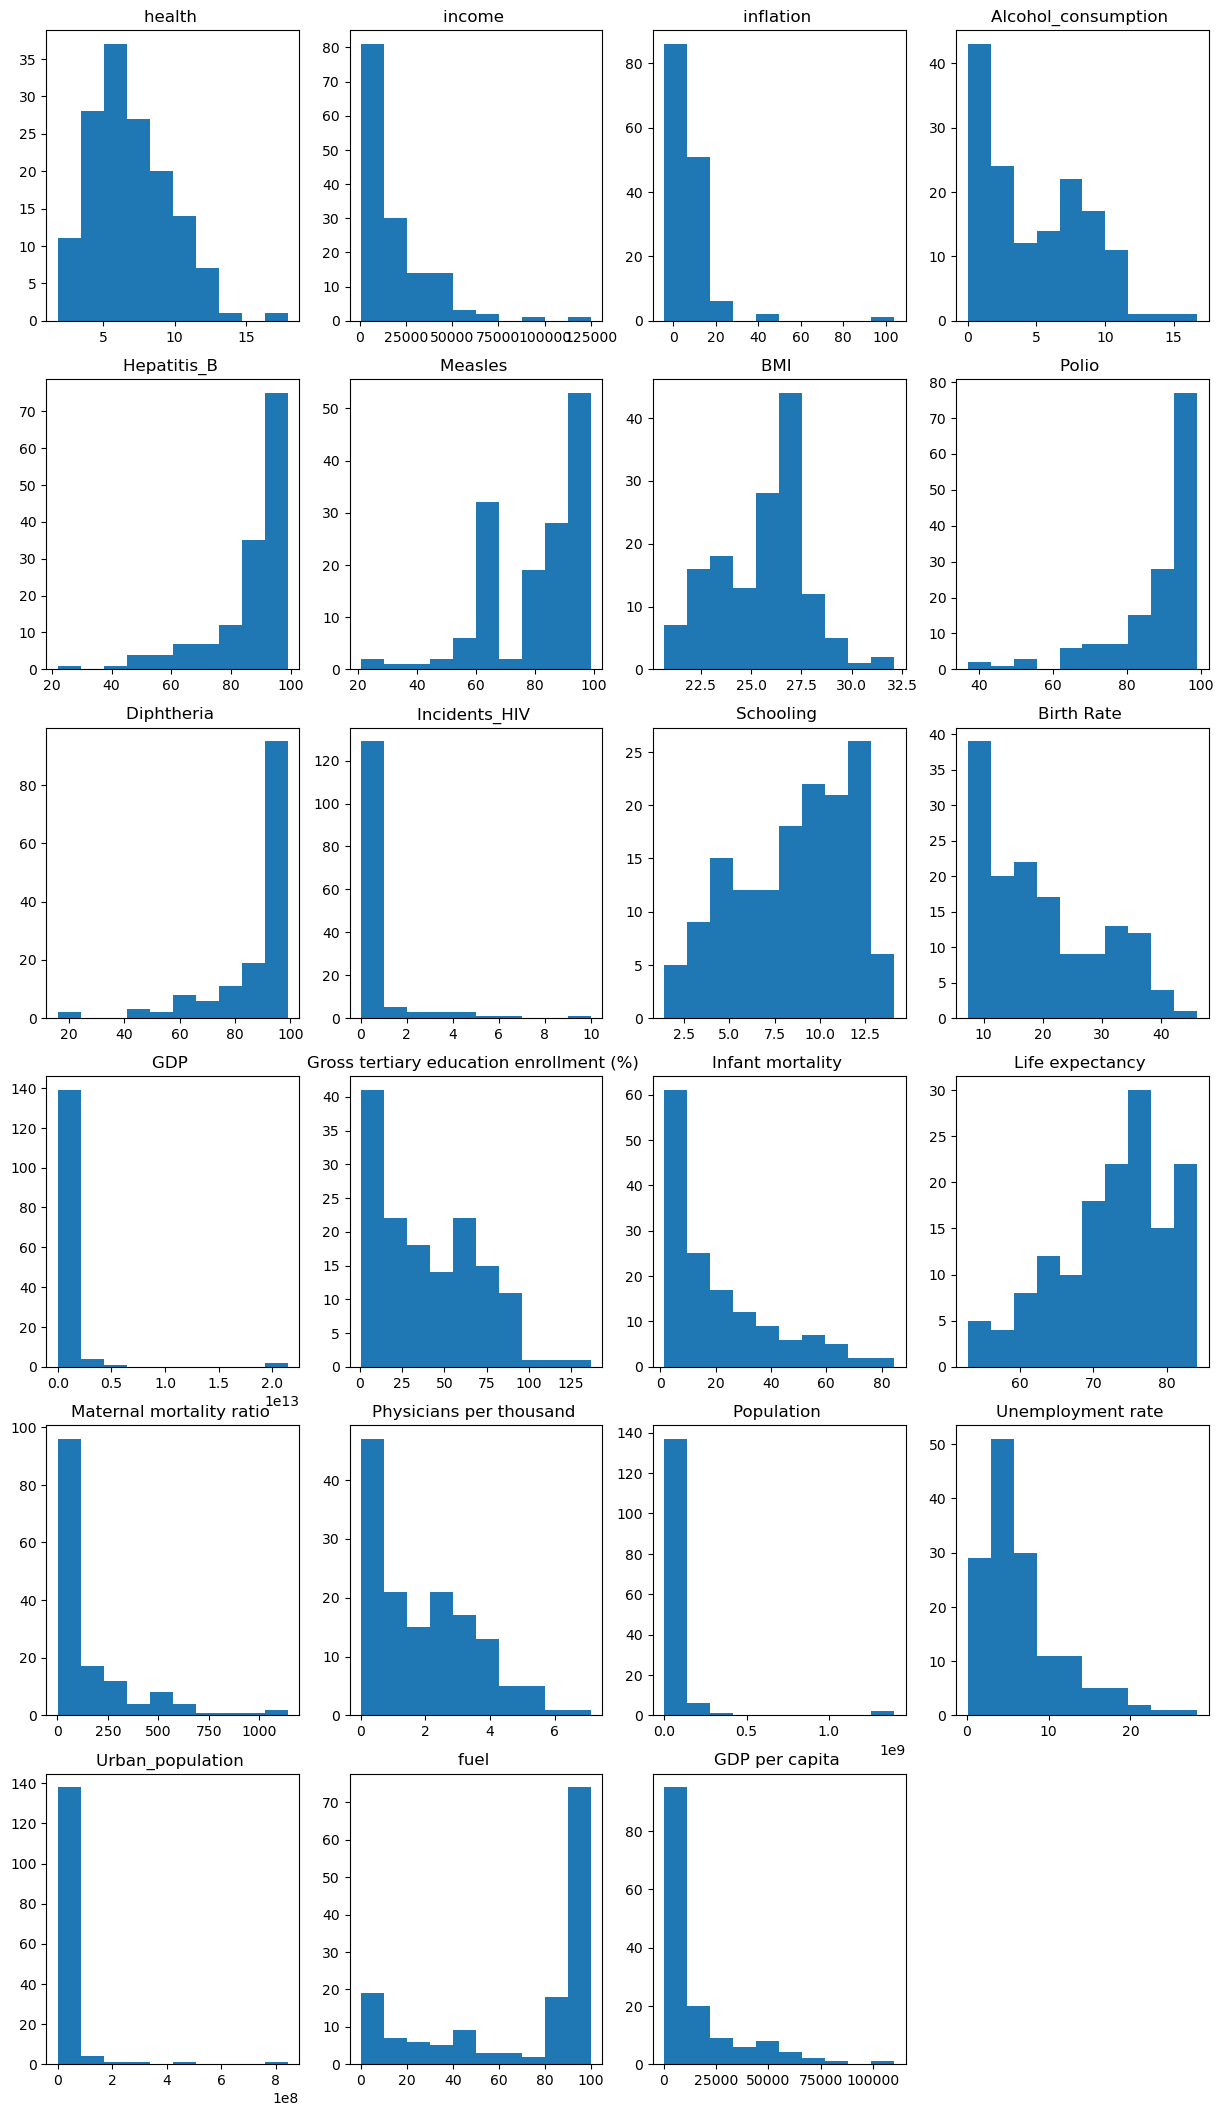

In [558]:
dist_plot(vis)

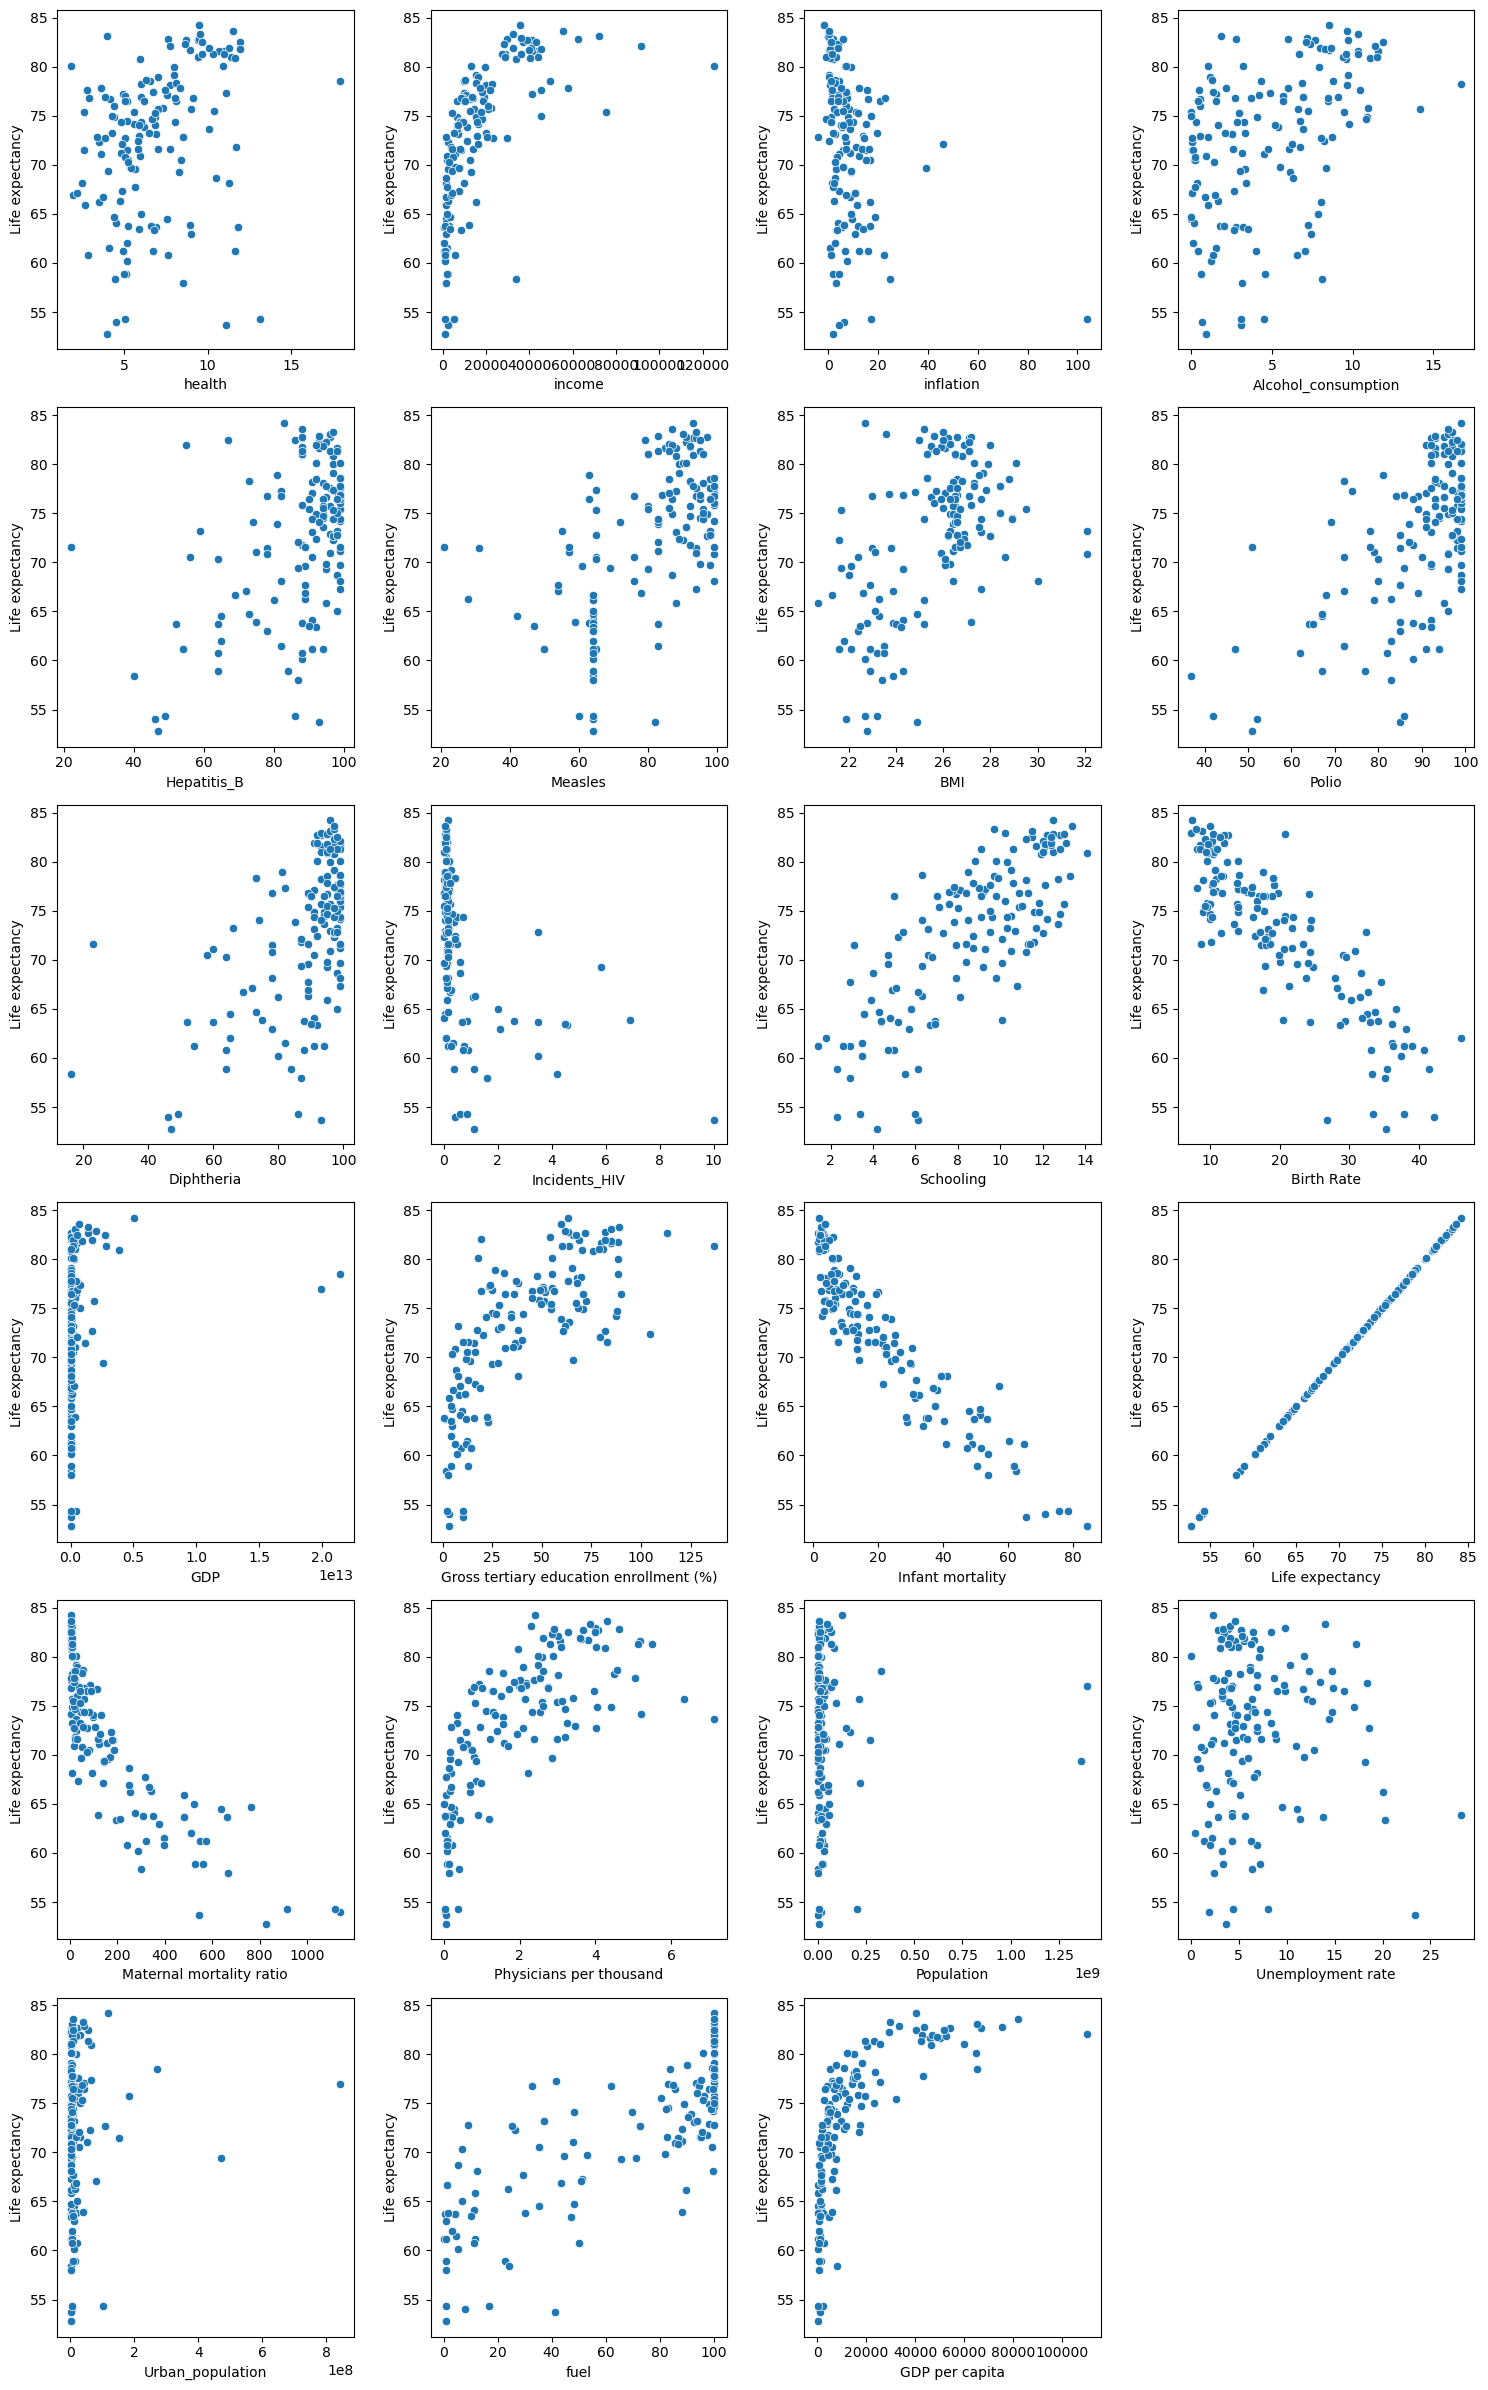

In [559]:
#Select numeric columns for the scatter plots
numeric_columns = vis.select_dtypes(include=['float64', 'int64']).columns

#Calculate the number of rows and columns for the subplot grid
num_cols = 4
num_rows = (len(numeric_columns) - 1) // num_cols + 1

plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=vis[column], y=vis['Life expectancy'])
    plt.xlabel(column)
    plt.ylabel('Life expectancy')

plt.tight_layout()
plt.show()

In [560]:
vis.corr(numeric_only=True)['Life expectancy'].sort_values()

Infant mortality                          -0.9
Birth Rate                                -0.9
Maternal mortality ratio                  -0.8
Incidents_HIV                             -0.5
inflation                                 -0.3
Unemployment rate                         -0.0
Population                                 0.0
Urban_population                           0.1
GDP                                        0.2
health                                     0.3
Hepatitis_B                                0.4
Alcohol_consumption                        0.4
BMI                                        0.5
Diphtheria                                 0.6
Measles                                    0.6
Polio                                      0.6
income                                     0.6
GDP per capita                             0.7
Physicians per thousand                    0.7
Gross tertiary education enrollment (%)    0.7
Schooling                                  0.8
fuel         

In [561]:
vis

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


<Axes: >

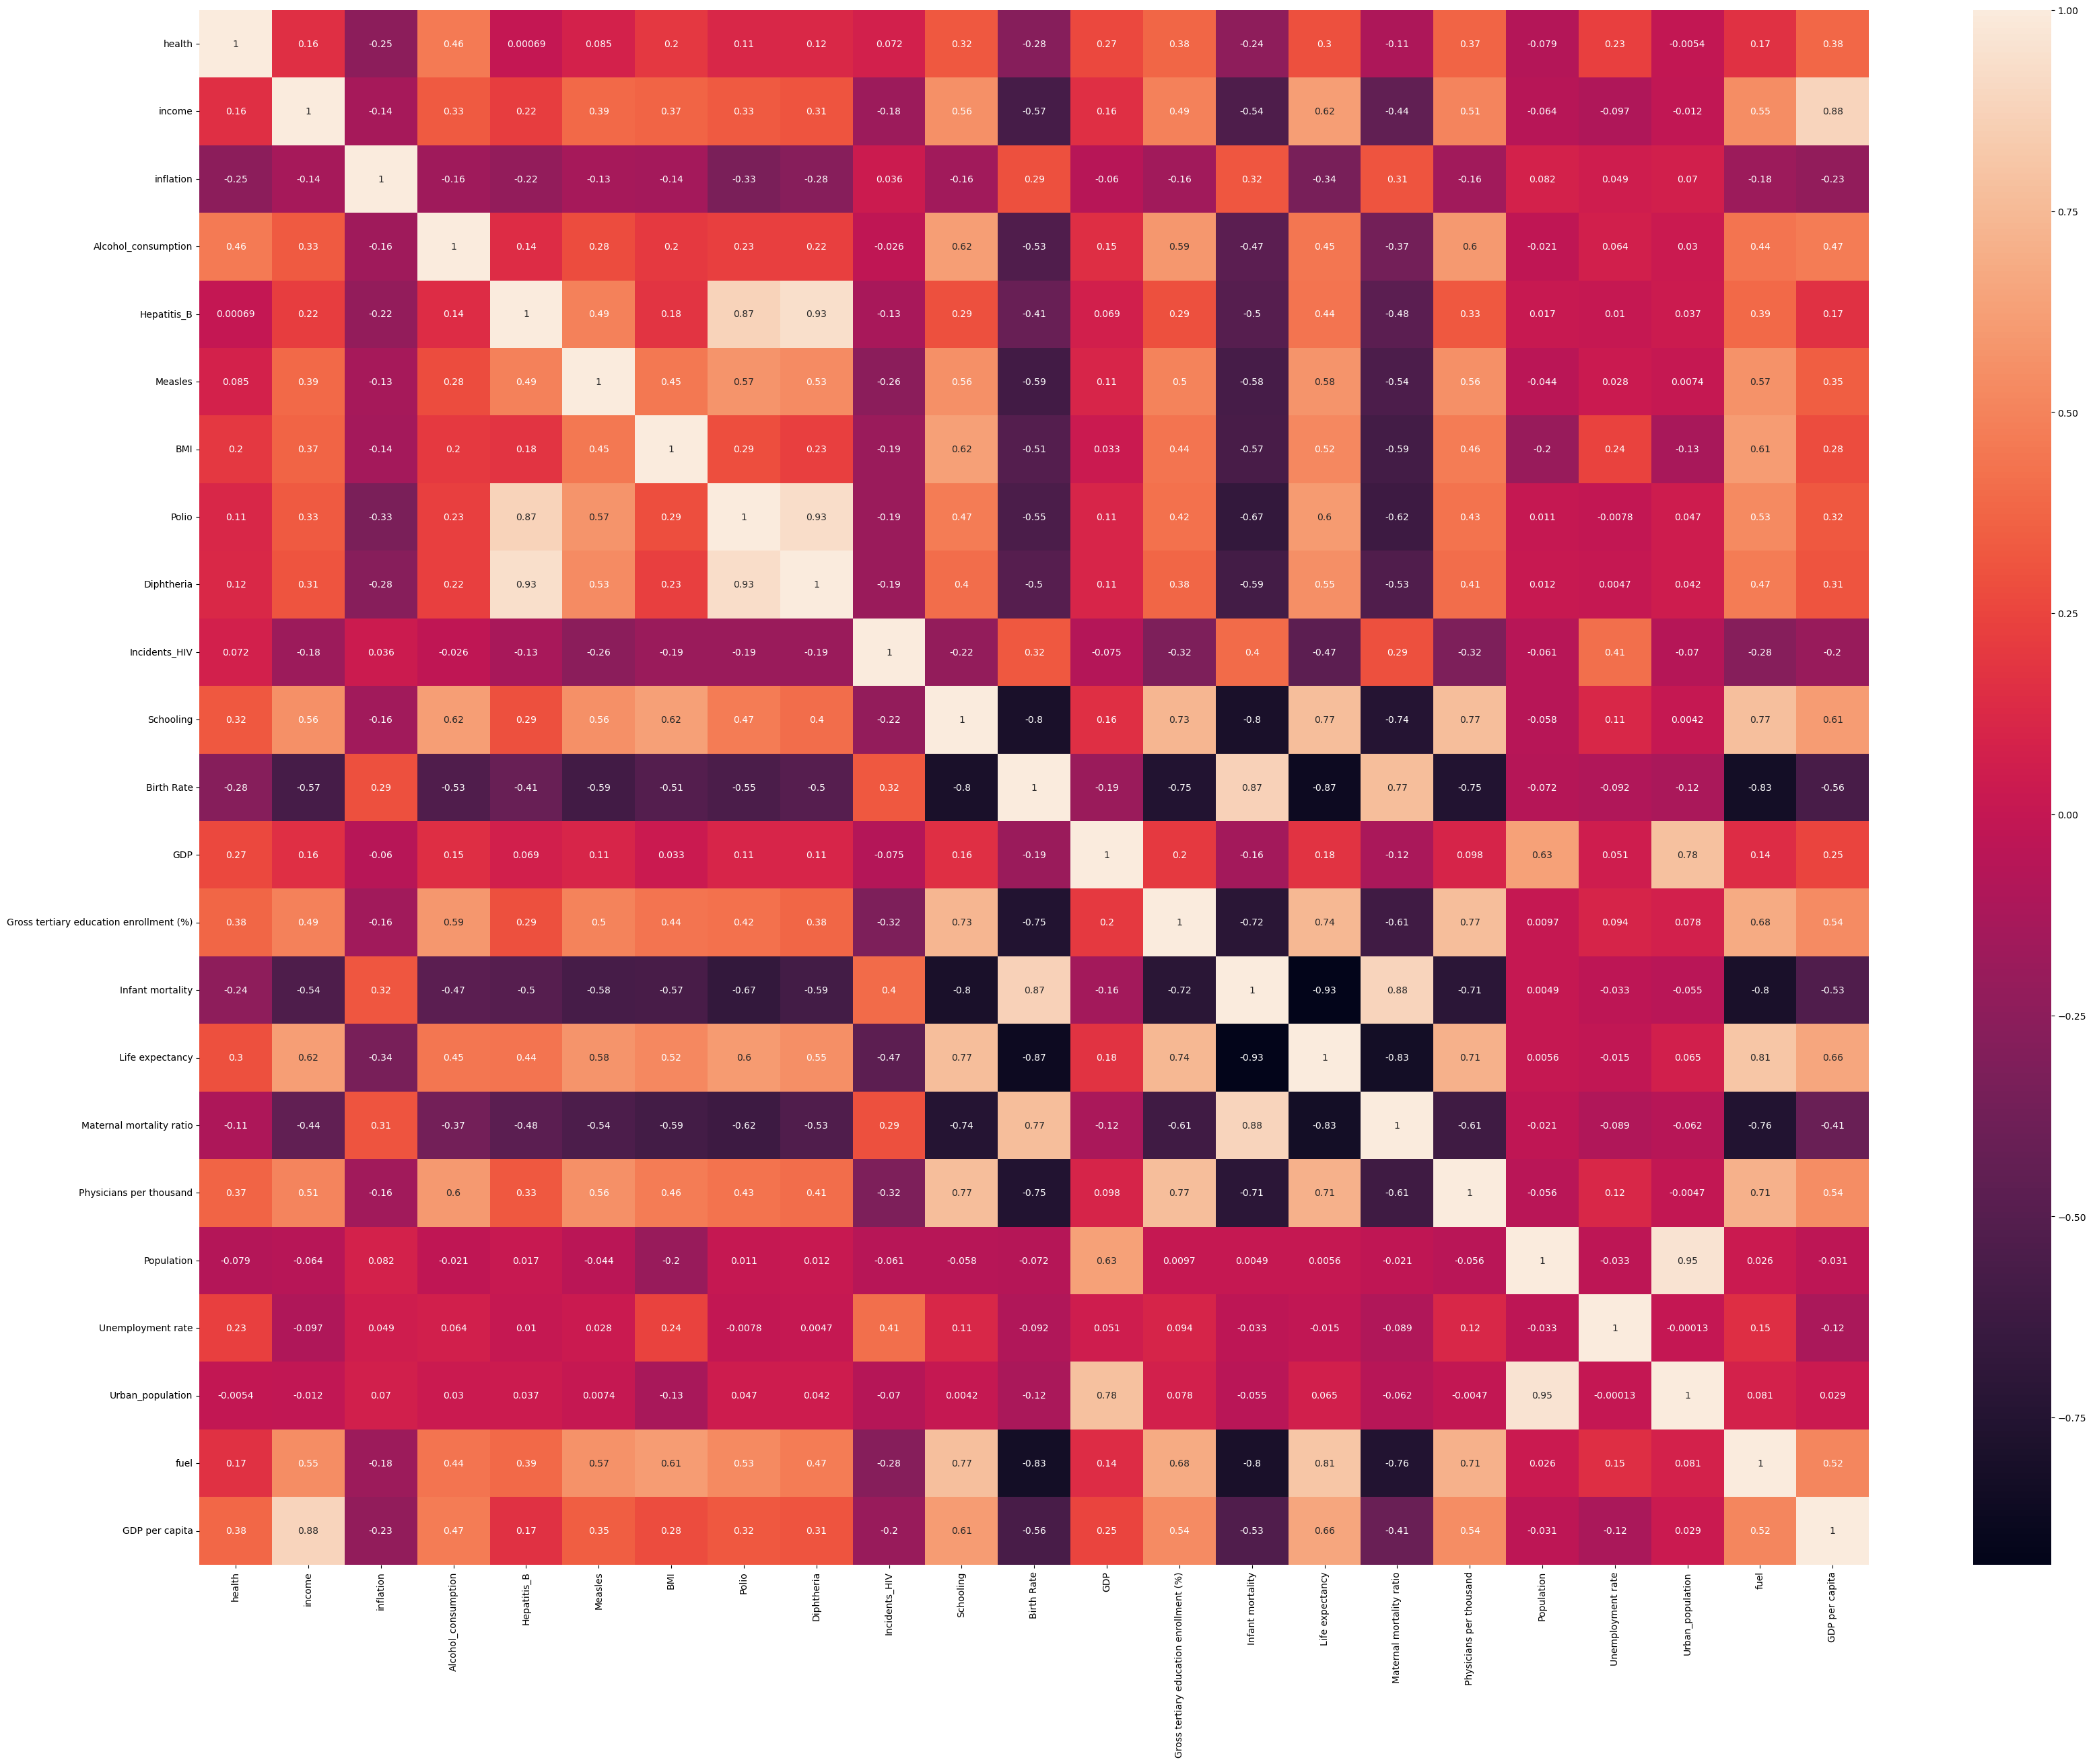

In [636]:
#data = data.drop('date',axis=1) (need to remove 'date' before calling data.corr() since date contains non-intable data) 
corr_matrix = vis.corr(numeric_only=True)
plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot=True)

# multi with 'fuel', 'Schooling', 'Incidents_HIV', 'Birth Rate', 'GDP per capita'

In [563]:
y = d1['Life expectancy']

In [564]:
# create a Python list of feature names
feature_cols = ['fuel', 'Schooling', 'Incidents_HIV', 'Birth Rate', 'GDP per capita']

# use the list to select a subset of the original DataFrame
X = d1[feature_cols]

# print the first 5 rows
X

,fuel,Schooling,Incidents_HIV,Birth Rate,GDP per capita
0,35.4,3.6,0.0,32.5,502.1
1,83.7,9.7,0.0,11.8,5352.9
2,99.7,7.9,0.1,24.3,3948.3
3,50.0,5.0,0.9,40.7,2973.6
4,100.0,9.2,0.2,15.3,17790.3
...,...,...,...,...,...
141,82.8,11.4,0.1,23.3,1724.8
142,6.9,6.8,0.2,29.6,3058.1
143,95.5,10.1,0.4,17.9,16915.5
144,96.1,8.0,0.1,16.8,2715.3


In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], d1.shape[0]))

train size=116, test_size=30, total_size=146


In [566]:
# create a model
linreg = LinearRegression()

In [567]:
# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [568]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 73.3888113657124
bi = [ 5.29580475e-02  1.21540705e-01 -1.11344993e+00 -3.16950270e-01
  9.32816966e-05]


In [569]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('fuel', 0.052958047477416295),
 ('Schooling', 0.12154070530234183),
 ('Incidents_HIV', -1.1134499254985761),
 ('Birth Rate', -0.3169502700483654),
 ('GDP per capita', 9.328169655564094e-05)]

In [570]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)
y_predicted

array([81.9183716 , 59.14631746, 81.34295505, 74.59536219, 64.78731521,
       64.24376495, 60.32476463, 60.34853512, 81.42459472, 72.39306823,
       77.96640624, 76.74647046, 71.77937356, 87.04423768, 80.57485391,
       78.66064064, 72.37054217, 82.58036316, 77.17480452, 60.9656141 ,
       80.3485835 , 80.02185681, 69.81961503, 73.22381462, 76.49344913,
       62.99343344, 80.63976635, 67.72616329, 64.38074054, 75.76697543])

In [571]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
Name: Life expectancy, dtype: float64

# Model Evaluation Metrics

The three common evaluation metrics for regression problems are:
1. MAE is the easiest to understand, because it's the average error.  (Mean Absolute Error)
2. MSE is more popular than MAE, because MSE "punishes" larger errors.  (Mean Squared Error)
3. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.  (Root Mean Squared Error)

- The RMSE. (Error is something we want to minimize, so a lower number for RMSE is better.)

In [572]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg.intercept_)
print('Coefficient:', linreg.coef_)

MAE:  2.4492947574751676
MSE:  9.299898610077728
RMSE:  3.0495735128174446
r2 score:  0.8524841577525539
Intercept:  73.3888113657124
Coefficient: [ 5.29580475e-02  1.21540705e-01 -1.11344993e+00 -3.16950270e-01
  9.32816966e-05]


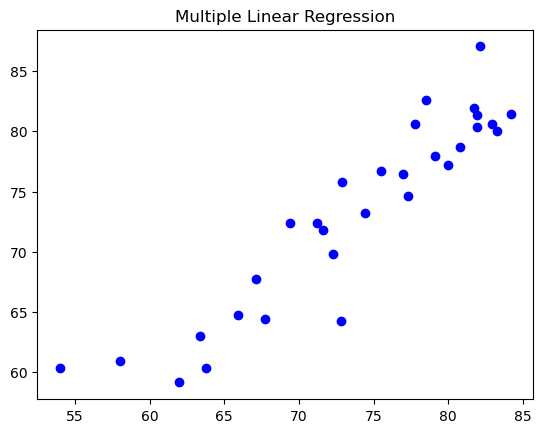

In [573]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# multi with ALL features except 'GDP','Population','Urban_population', 'Status', 'Gross tertiary education enrollment (%)'

In [574]:
# dropping unimportant features
multi_all_data = d1.copy()
multi_all_data.drop(['Country','Region','Unnamed: 0'],inplace=True,axis=1)
multi_all_data.drop(['GDP','Population','Urban_population', 'Status', 'Gross tertiary education enrollment (%)'],inplace=True,axis=1)

In [575]:
multi_all_data

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Unemployment rate,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,47.9,64.5,638.0,0.3,11.1,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,7.8,78.5,15.0,1.2,12.3,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,20.1,76.7,112.0,1.7,11.7,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,51.6,60.8,241.0,0.2,6.9,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,5.0,76.9,42.0,2.8,6.9,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,19.1,71.6,29.0,2.4,5.9,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,22.3,70.3,72.0,0.2,4.4,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,21.4,72.1,125.0,1.9,8.8,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,16.5,75.3,43.0,0.8,2.0,96.1,2715.3


In [576]:
multi_all_data['Birth Rate'] = np.log1p(analyse['Birth Rate'])  # Logarithmic transformation

In [577]:
y2 = multi_all_data['Life expectancy']
y2

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [578]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Unemployment rate', 'fuel', 'GDP per capita']


# use the list to select a subset of the original DataFrame
X2 = multi_all_data[feature_cols]

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.8, random_state=42, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], d1.shape[0]))

train size=116, test_size=30, total_size=146


In [580]:
linreg2 = LinearRegression()

In [581]:
# fit the model to our training data
linreg2.fit(X_train, y_train)

LinearRegression()

In [582]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg2.intercept_)
print('bi =', linreg2.coef_)

b0 = 85.8572334357789
bi = [ 2.53105393e-01 -2.52210456e-05 -2.84427724e-02 -1.92839612e-01
  2.84274002e-02  2.94386327e-02 -2.29505662e-01 -1.01150335e-01
  2.59558984e-02 -6.51148346e-01 -1.60207432e-01 -5.75421098e-01
 -2.64340688e-01 -2.80636360e-03 -2.18195936e-01  5.89961165e-02
  2.79779919e-02  1.16672639e-04]


In [583]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg2.coef_))

[('health', 0.25310539330662424),
 ('income', -2.5221045609507512e-05),
 ('inflation', -0.02844277236844356),
 ('Alcohol_consumption', -0.19283961225136845),
 ('Hepatitis_B', 0.028427400201833205),
 ('Measles', 0.02943863269528202),
 ('BMI', -0.22950566175076587),
 ('Polio', -0.10115033459724986),
 ('Diphtheria', 0.025955898438580354),
 ('Incidents_HIV', -0.6511483464798546),
 ('Schooling', -0.16020743241840615),
 ('Birth Rate', -0.5754210982406034),
 ('Infant mortality', -0.2643406878158904),
 ('Maternal mortality ratio', -0.0028063635995396116),
 ('Physicians per thousand', -0.21819593569026408),
 ('Unemployment rate', 0.058996116495006676),
 ('fuel', 0.027977991942755857),
 ('GDP per capita', 0.00011667263879685962)]

In [584]:
# make predictions on the testing set
y_predicted = linreg2.predict(X_test)
y_predicted

array([81.75459851, 62.57431515, 80.4647552 , 79.47765764, 67.72064845,
       72.90267686, 56.27351298, 64.96507021, 81.40334676, 71.10057567,
       75.98246347, 77.4813954 , 71.87503266, 86.35137749, 78.84013247,
       77.83463723, 70.31218802, 84.52172991, 76.8069965 , 60.65799932,
       80.14441606, 80.40489507, 70.94950889, 75.23968914, 77.50775828,
       67.5659854 , 80.99044902, 61.9993936 , 69.21330697, 72.79599619])

In [585]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg2.intercept_)
print('Coefficient:', linreg2.coef_)
# Explained variance score: 1 is perfect prediction

MAE:  1.968588040170495
MSE:  6.1470204609810635
RMSE:  2.479318547702385
r2 score:  0.9024953992905599
Intercept:  85.8572334357789
Coefficient: [ 2.53105393e-01 -2.52210456e-05 -2.84427724e-02 -1.92839612e-01
  2.84274002e-02  2.94386327e-02 -2.29505662e-01 -1.01150335e-01
  2.59558984e-02 -6.51148346e-01 -1.60207432e-01 -5.75421098e-01
 -2.64340688e-01 -2.80636360e-03 -2.18195936e-01  5.89961165e-02
  2.79779919e-02  1.16672639e-04]


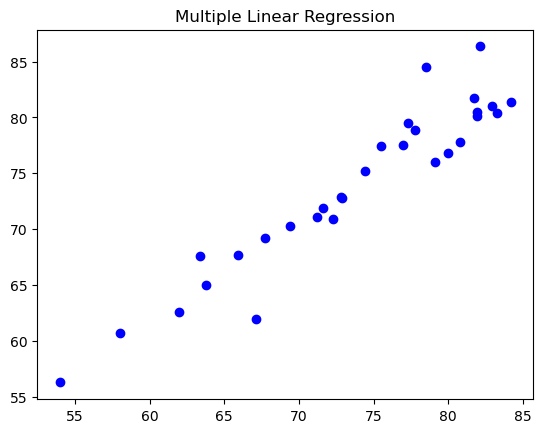

In [586]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# multi with 'Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio'

In [587]:
# use the list to select a subset of the original DataFrame
X3 = d1[['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]

In [588]:
# select a Series from the DataFrame for y
y3 = d1['Life expectancy']

# print the first 5 values
y3.head()

0   64.5
1   78.5
2   76.7
3   60.8
4   76.9
Name: Life expectancy, dtype: float64

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=42, shuffle=True)

In [590]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 6)
(109,)
(37, 6)
(37,)


In [591]:
# create a model
linreg3  = LinearRegression()

# fit the model to our training data
linreg3.fit(X_train, y_train)

LinearRegression()

In [592]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg3.intercept_)
print('bi =', linreg3.coef_)

b0 = 52.43212544329392
bi = [ 4.23267053e-01  1.30132297e-04  9.37449133e-02 -2.20900292e-05
  1.57179422e-01  1.10255519e-01]


In [593]:
# pair the feature names with the coefficients
list(zip(['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio'], linreg3.coef_))

[('Physicians per thousand', 0.4232670527681209),
 ('GDP per capita', 0.0001301322970121618),
 ('fuel', 0.09374491329444416),
 ('income', -2.2090029215944822e-05),
 ('Schooling', 0.15717942203602842),
 ('Polio', 0.11025551886501217)]

In [594]:
# make predictions on the testing set
y_predicted = linreg3.predict(X_test)
y_predicted

array([81.51949326, 62.2186121 , 80.2130698 , 67.39999398, 64.63392551,
       63.80490512, 59.34351544, 63.02392663, 80.15491719, 74.00828505,
       77.22518368, 74.19031595, 74.03528477, 88.19342834, 79.79562941,
       77.11540149, 70.08484785, 82.65947104, 76.61631949, 62.24802261,
       80.26768108, 78.79985509, 66.96567088, 75.66778939, 74.83852359,
       68.69888562, 78.86758838, 66.42817277, 65.18551719, 75.74996471,
       75.7960334 , 64.19223981, 68.85234872, 64.67493484, 61.50422247,
       76.90200885, 80.29739547])

In [595]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
4     76.9
26    58.9
123   76.8
128   65.0
16    61.5
10    77.2
138   81.3
Name: Life expectancy, dtype: float64

In [596]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg3.intercept_)
print('Coefficient:', linreg3.coef_)

MAE:  3.008838277257572
MSE:  15.147203428114356
RMSE:  3.8919408305001704
r2 score:  0.7679490676557765
Intercept:  52.43212544329392
Coefficient: [ 4.23267053e-01  1.30132297e-04  9.37449133e-02 -2.20900292e-05
  1.57179422e-01  1.10255519e-01]


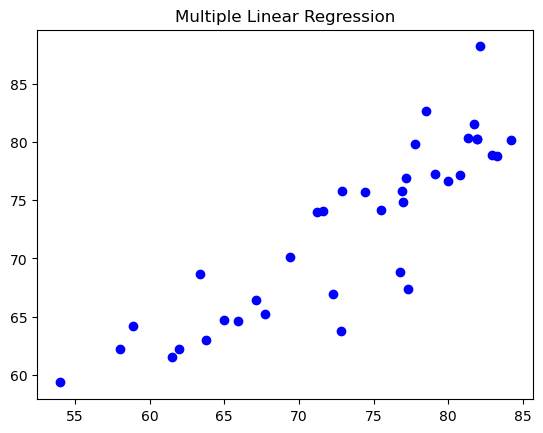

In [597]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')

# simpe linear

In [598]:
X4 = d1['Infant mortality'].values.reshape(-1,1)
y4 = d1['Life expectancy'].values.reshape(-1,1)

<Axes: xlabel='Infant mortality', ylabel='Life expectancy'>

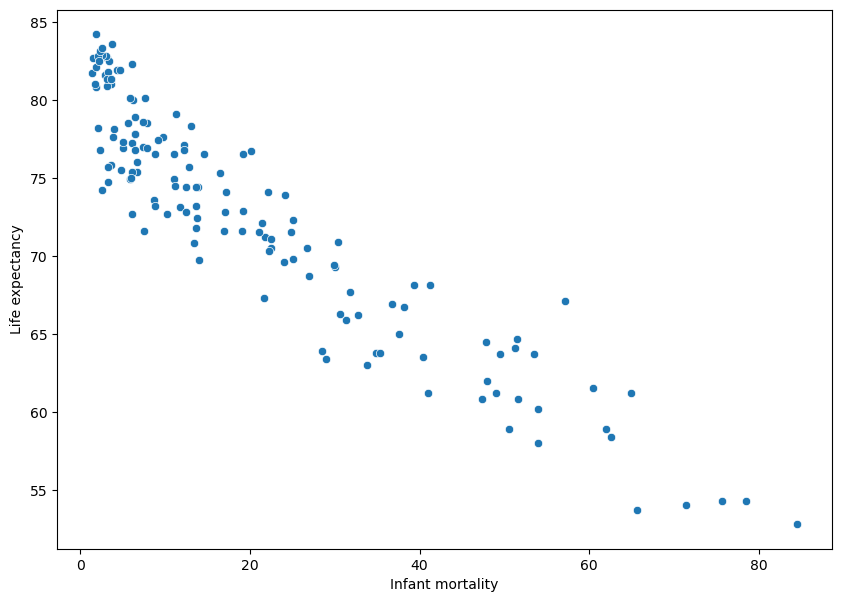

In [599]:
# plot all
plt.figure(figsize=(10,7))
sns.scatterplot(x='Infant mortality', y='Life expectancy', data=d1)

In [600]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X4, y4, random_state=42, train_size=0.8, shuffle=True) 

In [601]:
# creating an instance of Linear Regression model
myreg4 = LinearRegression()

In [602]:
# fit it to our data
myreg4.fit(X_train, y_train)

LinearRegression()

In [603]:
# get the calculated coefficients
a = myreg4.coef_
b = myreg4.intercept_

In [604]:
a

array([[-0.34880791]])

In [605]:
b

array([79.67880049])

In [606]:
y_predicted = myreg4.predict(X_test)
y_predicted

array([[79.19046942],
       [62.93602096],
       [78.17892649],
       [77.93476096],
       [68.761113  ],
       [73.71418528],
       [54.77391593],
       [67.36588137],
       [79.05094626],
       [72.07478812],
       [75.73727114],
       [78.00452254],
       [73.01656947],
       [79.01606547],
       [77.4115491 ],
       [79.01606547],
       [69.24944407],
       [77.72547621],
       [77.51619147],
       [60.84317351],
       [78.03940333],
       [78.80678072],
       [70.92372203],
       [74.83037058],
       [77.09762198],
       [69.56337119],
       [78.77189993],
       [59.72698821],
       [68.58670905],
       [72.98168868]])

In [607]:
test1 = myreg4.predict([[5]])
test1

array([[77.93476096]])

Text(0, 0.5, 'Life expectancy')

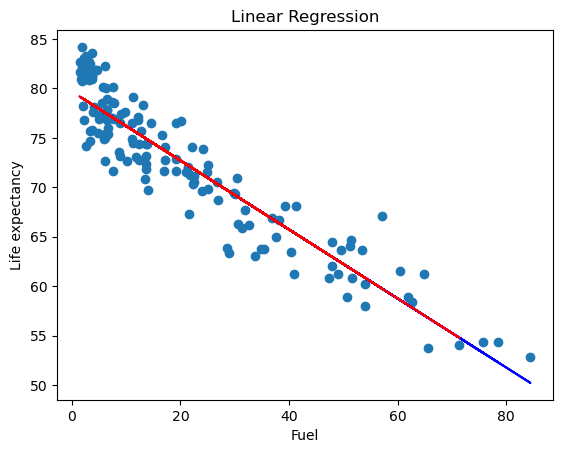

In [608]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X4, y4)
plt.plot(X_train, (a*X_train) + b, color='blue')
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('Fuel')
plt.ylabel('Life expectancy')

In [609]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', myreg4.intercept_)
print('Coefficient:', myreg4.coef_)

MAE:  2.320783109909655
MSE:  8.856958858081102
RMSE:  2.97606432357923
r2 score:  0.8595101086064537
Intercept:  [79.67880049]
Coefficient: [[-0.34880791]]


# lasso 5

In [610]:
# dropping unimportant features
lasso_data = d1.copy()
lasso_data.drop(['Country','Region','Unnamed: 0'],inplace=True,axis=1)

In [611]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'GDP', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Population', 'Unemployment rate', 'Urban_population',  'fuel', 'GDP per capita']

In [612]:
# use the list to select a subset of the original DataFrame
X5 = lasso_data[feature_cols]

In [613]:
y5 = lasso_data['Life expectancy']
y5

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=42, train_size=0.8)

In [616]:
lasso = Lasso(alpha = 1)

In [617]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [618]:
# the intercept and coefficients are stored in system variables
print('b0 =', lasso.intercept_)
print('bi =', lasso.coef_)

b0 = 75.64213117653303
bi = [ 0.00000000e+00 -4.49890534e-05 -2.24420186e-02 -1.24985188e-01
  0.00000000e+00  1.68898128e-02 -0.00000000e+00 -1.12751785e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.69491801e-13 -2.65631015e-01 -5.31458169e-04 -0.00000000e+00
  4.07476041e-09 -0.00000000e+00 -5.36193411e-09  2.34576958e-02
  1.30071585e-04]


In [619]:
# pair the feature names with the coefficients
list(zip(feature_cols, lasso.coef_))

[('health', 0.0),
 ('income', -4.4989053382639996e-05),
 ('inflation', -0.02244201861788924),
 ('Alcohol_consumption', -0.1249851875524479),
 ('Hepatitis_B', 0.0),
 ('Measles', 0.016889812823874053),
 ('BMI', -0.0),
 ('Polio', -0.01127517846654746),
 ('Diphtheria', 0.0),
 ('Incidents_HIV', -0.0),
 ('Schooling', -0.0),
 ('Birth Rate', -0.0),
 ('GDP', 3.694918009295672e-13),
 ('Infant mortality', -0.2656310145381031),
 ('Maternal mortality ratio', -0.0005314581694913443),
 ('Physicians per thousand', -0.0),
 ('Population', 4.074760414667001e-09),
 ('Unemployment rate', -0.0),
 ('Urban_population', -5.3619341142306415e-09),
 ('fuel', 0.02345769584384511),
 ('GDP per capita', 0.0001300715845492056)]

In [620]:
# make predictions on the testing set
y_predicted = lasso.predict(X_test)
y_predicted

array([81.64043171, 62.87922067, 81.10524918, 75.65868588, 67.36757506,
       71.31276335, 56.58133769, 65.74840245, 82.33278995, 71.77276456,
       75.83921463, 76.01876363, 72.4583331 , 86.54517345, 79.43516117,
       77.77924719, 72.96686319, 89.84173457, 76.72493664, 60.68632399,
       80.17828706, 79.41178985, 70.35010094, 74.69246602, 85.261676  ,
       68.85189724, 80.19476632, 61.97018845, 67.72929859, 72.82505735])

In [621]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
Name: Life expectancy, dtype: float64

In [622]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', lasso.intercept_)
print('Coefficient:', lasso.coef_)

MAE:  2.5804494292354927
MSE:  12.627562312135156
RMSE:  3.553528149900484
r2 score:  0.7997004517889947
Intercept:  75.64213117653303
Coefficient: [ 0.00000000e+00 -4.49890534e-05 -2.24420186e-02 -1.24985188e-01
  0.00000000e+00  1.68898128e-02 -0.00000000e+00 -1.12751785e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.69491801e-13 -2.65631015e-01 -5.31458169e-04 -0.00000000e+00
  4.07476041e-09 -0.00000000e+00 -5.36193411e-09  2.34576958e-02
  1.30071585e-04]


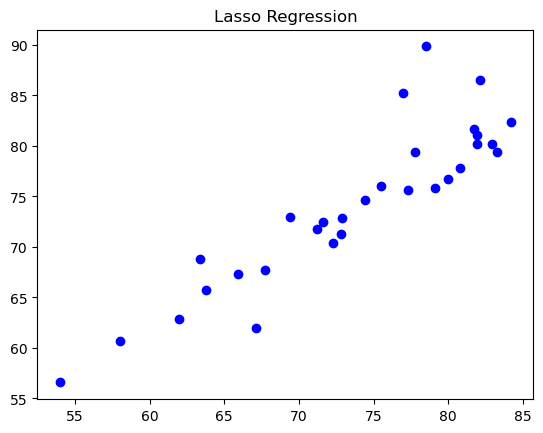

In [623]:
# Visualise the regression results
plt.title('Lasso Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

In [624]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Assuming 'X' is your feature matrix and 'y' is your target variable
param_grid = {'alpha': [0.000000000000000000000001, 0.00001, 0.0001, 0.001, 0.003, 0.01, 0.1, 1, 10, 100,1000,100000]}  # Adjust the range based on your dataset

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X5, y5)

print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 1


In [625]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
lasso_best_model = grid_search.best_estimator_

# Extract coefficients and feature names
feature_importance_lasso = pd.DataFrame({'Feature': X5.columns, 'Coefficient': lasso_best_model.coef_})

# Display feature importance based on Lasso coefficients
print("Feature Importance Based on Lasso Coefficients:")
print(feature_importance_lasso)

# Extract coefficients for linear regression
linreg.fit(X5, y5)
feature_importance_linear_reg = pd.DataFrame({'Feature': X5.columns, 'Coefficient': linreg.coef_})

# Display feature importance based on linear regression coefficients
print("\nFeature Importance Based on Linear Regression Coefficients:")
print(feature_importance_linear_reg)

Feature Importance Based on Lasso Coefficients:
                     Feature  Coefficient
0                     health          0.0
1                     income         -0.0
2                  inflation         -0.0
3        Alcohol_consumption         -0.1
4                Hepatitis_B         -0.0
5                    Measles          0.0
6                        BMI         -0.0
7                      Polio         -0.0
8                 Diphtheria          0.0
9              Incidents_HIV         -0.0
10                 Schooling         -0.0
11                Birth Rate         -0.1
12                       GDP         -0.0
13          Infant mortality         -0.2
14  Maternal mortality ratio         -0.0
15   Physicians per thousand         -0.0
16                Population         -0.0
17         Unemployment rate         -0.0
18          Urban_population          0.0
19                      fuel          0.0
20            GDP per capita          0.0

Feature Importance Based on

# POLY


In [646]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'GDP', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Population', 'Unemployment rate', 'Urban_population',  'fuel', 'GDP per capita']

In [647]:
# use the list to select a subset of the original DataFrame
X6 = d1[feature_cols]
X6

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,GDP,Infant mortality,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,19101353833.0,47.9,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,15278077447.0,7.8,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,169988236398.0,20.1,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,94635415870.0,51.6,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,1727759259.0,5.0,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,57921286440.0,19.1,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,917058851.0,22.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,482359318768.0,21.4,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,261921244843.0,16.5,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [648]:
y6 = d1['Life expectancy']
y6

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [649]:
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=0)

In [650]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [651]:
polyfeat = PolynomialFeatures(degree =3)

In [652]:
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)

In [653]:
poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)

LinearRegression()

In [654]:
y_prediction = poly.predict(xtest_poly)
y_prediction

array([82.51557706, 60.42716949, 80.68710054, 76.604698  , 76.42836311,
       84.12168715, 71.35403474, 72.15279655, 77.41696536, 66.5577458 ,
       75.57805042, 70.99510694, 62.7699531 , 69.24789414, 75.25821635,
       57.43483638, 57.75060081, 48.92513757, 56.10610878, 84.50796196,
       75.46500847, 81.55234372, 65.1260589 , 79.00060604, 75.23213643,
       61.40806456, 75.18321132, 72.80594603, 57.51574725, 79.30014756])

In [655]:
print('Poly model 1')
mean_squared_error = metrics.mean_squared_error(y_test, y_prediction)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))

Poly model 1
Mean Squared Error (MSE)  4.79
R-squared (training)  1.0
R-squared (testing)  0.689


## Strong Negative Correlations:
- Infant mortality: -0.9
- Birth Rate: -0.9
- Maternal mortality ratio: -0.8
- Incidents_HIV: -0.5
- Inflation: -0.3

## Weak/Negligible Correlations:
- Unemployment rate: -0.0
- Population: 0.0
- Unnamed: 0: 0.0 (This seems to be an index or identifier column)
- Urban population: 0.1
- GDP: 0.2

## Moderate Positive Correlations:
- Health: 0.3
- Hepatitis_B: 0.4
- Alcohol consumption: 0.4
- BMI: 0.5
- Diphtheria: 0.6
- Measles: 0.6
- Status: 0.6
- Polio: 0.6
- Income: 0.6

## Strong Positive Correlations:
- GDP per capita: 0.7
- Physicians per thousand: 0.7
- Gross tertiary education enrollment (%): 0.7

## Very Strong Positive Correlations:
- Schooling: 0.8
- Fuel: 0.8